In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd

In [128]:
plt.rcParams['figure.figsize'] = (6,6)
plt.rcParams.update({'font.size': 12})

<h1>Bandgap</h1>

In [69]:
fname = '../../data/testing/20220223_132341_bandgap_10800x.csv'

# Reading by rows
df = pd.read_csv(fname, header=None).set_index(0).T

In [70]:
teensy_vec = np.array(df['Teensy Internal Temp'])
temp_vec = np.array(df['TMP102'])
chamber_vec = np.array(df['Chamber'])
vbg_vec = np.array(df['Bandgap (V)'])

Bandgap Voltage Range: 0.056044006000000035


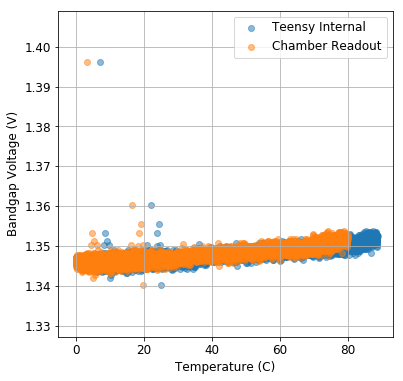

In [129]:
### Bandgap voltage plotting
plt.scatter(teensy_vec, vbg_vec, alpha=0.5, label='Teensy Internal')
plt.scatter(chamber_vec, vbg_vec, alpha=0.5, label='Chamber Readout')
# plt.scatter(temp_vec, vbg_vec, alpha=0.5, label='TMP102')

plt.legend()
plt.grid(True)
plt.ylabel('Bandgap Voltage (V)');
plt.xlabel('Temperature (C)');

print(f'Bandgap Voltage Range: {max(vbg_vec)-min(vbg_vec)}')

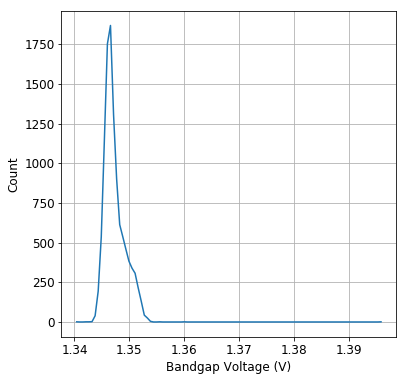

In [130]:
vbg_hist, vbg_bins_raw = np.histogram(vbg_vec, bins=100)
vbg_bins = 0.5*(vbg_bins_raw[1:] + vbg_bins_raw[:-1])
plt.plot(vbg_bins, vbg_hist)
plt.xlabel('Bandgap Voltage (V)')
plt.ylabel('Count')
plt.grid(True)

Text(0,0.5,'Count')

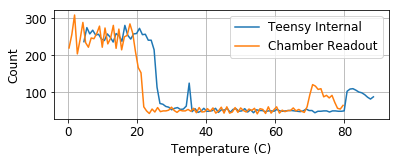

In [122]:
### Temp Comparison Plotting
# Histogram
n_bins = 100

teensy_hist, teensy_bins_raw = np.histogram(teensy_vec, bins=n_bins)
chamber_hist, chamber_bins_raw = np.histogram(chamber_vec, bins=n_bins)
# temp_hist, temp_bins_raw = np.histogram(temp_vec, bins=n_bins)

teensy_bins = 0.5*(teensy_bins_raw[1:] + teensy_bins_raw[:-1])
chamber_bins = 0.5*(chamber_bins_raw[1:] + chamber_bins_raw[:-1])
# temp_bins = 0.5*(temp_bins_raw[1:] + temp_binw_raw[:-1])

plt.plot(teensy_bins, teensy_hist, label='Teensy Internal')
plt.plot(chamber_bins, chamber_hist, label='Chamber Readout')
# plt.plot(temp_bins, temp_hist, label='TMP102')

plt.legend()
plt.grid(True)
plt.xlabel('Temperature (C)')
plt.ylabel('Count')

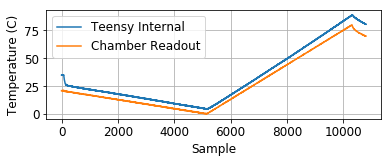

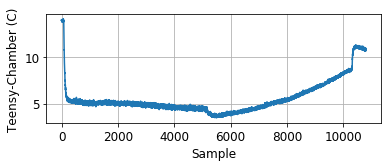

In [123]:
# Temp Differences
plt.plot(teensy_vec, label='Teensy Internal')
plt.plot(chamber_vec, label='Chamber Readout')
# plt.plot(temp_vec, label='TMP102')
plt.xlabel('Sample')
plt.ylabel('Temperature (C)')
plt.legend()
plt.grid(True)

plt.figure()
plt.plot(teensy_vec-chamber_vec, label='Teensy Internal - Chamber Readout')
plt.xlabel('Sample')
plt.ylabel('Teensy-Chamber (C)')
plt.grid(True)

In [124]:
# 